In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt 
from scipy.stats import vonmises_fisher 
from matplotlib.colors import Normalize
from vMF_distribution import VonMisesFisher
from pathlib import Path

np.random.default_rng() # reproducibility

%load_ext autoreload

Generator(PCG64) at 0x1287FF69460

In [13]:
figure_folder = Path().resolve().parent.parent / 'Slides' / 'figures'
figure_folder

WindowsPath('C:/Users/INES/Documents/3A_MVA/CompStats/projet-compstats-2023/Slides/figures')

In [2]:
%autoreload 2

## Test von Mises Fisher density and sampling

In [3]:
n_grid = 100
# create 2D grid in a spherical coordinate theta and phi
u = np.linspace(0, np.pi, n_grid)
v = np.linspace(0, 2 * np.pi, n_grid)
u_grid, v_grid = np.meshgrid(u, v)

# convert to cartesian coordinates
vertices = np.stack([np.cos(v_grid) * np.sin(u_grid),
                     np.sin(v_grid) * np.sin(u_grid),
                     np.cos(u_grid)],
                    axis=2)
print('vertices.shape:', vertices.shape)

x = np.outer(np.cos(v), np.sin(u)) # outer product of two vectors
y = np.outer(np.sin(v), np.sin(u))
z = np.outer(np.ones_like(u), np.cos(u))
print(f'x {x.shape}, y {y.shape}, z {z.shape}')

vertices.shape: (100, 100, 3)
x (100, 100), y (100, 100), z (100, 100)


mu norm 1.0
 pdf values 0.7951850391811837
 pdf values 3.173098223982442
 pdf values 15.667044431526525


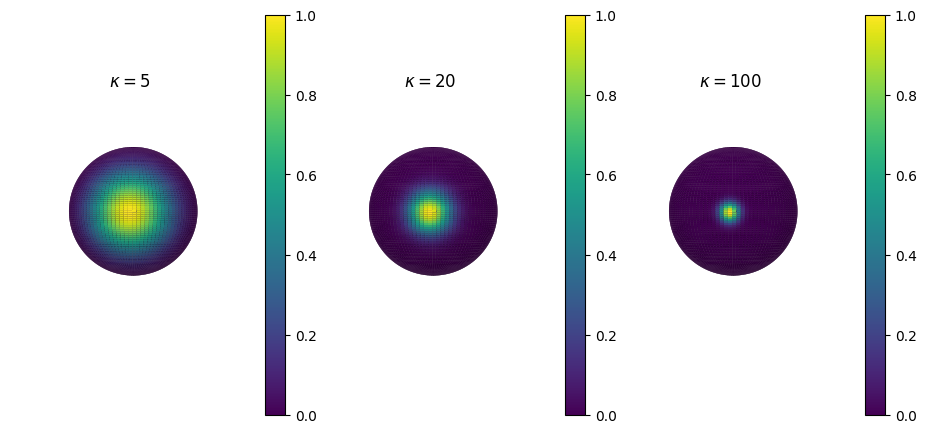

In [15]:
def plot_VMF_density(ax, x, y, z, vertices, mu, kappa):
    vmf = VonMisesFisher(mu, kappa)
    h, w = vertices.shape[:2]
    pdf_values = np.zeros((h, w))
    for i, j in np.ndindex(h, w):
        pdf_values[i, j] = vmf.pdf(vertices[i, j])
    
    print(f' pdf values {pdf_values.max()}')

    pdfnorm = Normalize(vmin=pdf_values.min(), vmax=pdf_values.max())

    m = ax.plot_surface(x, y, z, rstride=1, cstride=1,
                    facecolors = plt.cm.viridis(pdfnorm(pdf_values)),
                    linewidth=0)
    plt.colorbar(m, ax=ax)
    ax.set_aspect('equal')
    ax.view_init(azim=-130, elev=0)
    ax.axis('off')
    ax.set_title(rf"$\kappa={kappa}$")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4),
                         subplot_kw={"projection": "3d"})
left, middle, right = axes
mu = torch.tensor([-np.sqrt(0.5), -np.sqrt(0.5), 0])
print('mu norm', np.linalg.norm(mu))
plot_VMF_density(left, x, y, z, vertices, mu, 5)
plot_VMF_density(middle, x, y, z, vertices, mu, 20)
plot_VMF_density(right, x, y, z, vertices, mu, 100)
plt.subplots_adjust(top=1, bottom=0.0, left=0.0, right=1.0, wspace=0.)
plt.show()

fig.savefig(figure_folder / 'vMF_density.png')

samples  (20, 3)
samples  (20, 3)
samples  (20, 3)


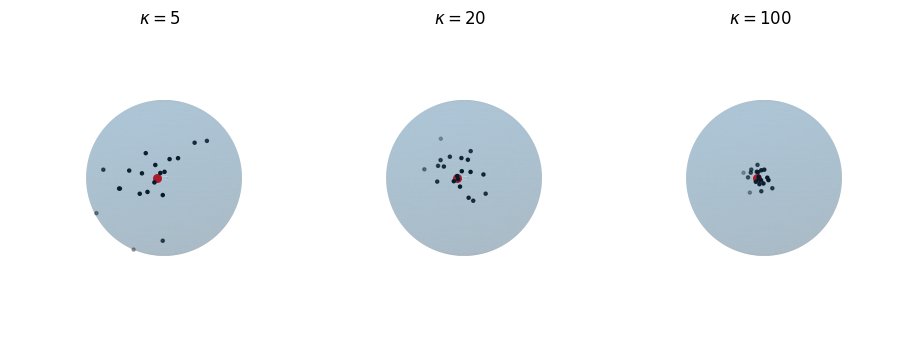

In [16]:
def plot_vmf_samples(ax, x, y, z, mu, kappa):
    vmf = vonmises_fisher(mu, kappa)
    samples = vmf.rvs(20)
    print('samples ', samples.shape)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                    alpha=0.2) # rstride, cstride : downsampling stride in each direction to determine the number of point to be plotted
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c='k', s=5)
    ax.scatter(mu[0], mu[1], mu[2], c='r', s=30)
    ax.set_aspect('equal')
    ax.view_init(azim=-130, elev=0)
    ax.axis('off')
    ax.set_title(rf"$\kappa={kappa}$")


mu = np.array([-np.sqrt(0.5), -np.sqrt(0.5), 0])
fig, axes = plt.subplots(nrows=1, ncols=3,
                         subplot_kw={"projection": "3d"},
                         figsize=(9, 4))
left, middle, right = axes
plot_vmf_samples(left, x, y, z, mu, 5)
plot_vmf_samples(middle, x, y, z, mu, 20)
plot_vmf_samples(right, x, y, z, mu, 100)
plt.subplots_adjust(top=1, bottom=0.0, left=0.0,
                    right=1.0, wspace=0.)
plt.show()

fig.savefig(figure_folder / 'vMF_sampling_scipy.png')

samples  torch.Size([20, 3])
samples  torch.Size([20, 3])
samples  torch.Size([20, 3])


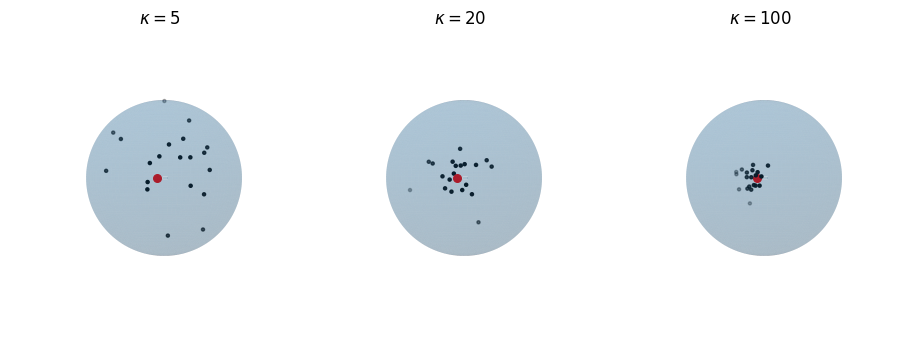

In [17]:
def plot_vmf_samples_ours(ax, x, y, z, mu, kappa):
    vmf = VonMisesFisher(mu=mu, kappa=kappa)
    samples = vmf.sample(n_samples=20)
    print('samples ', samples.shape)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                    alpha=0.2) # rstride, cstride : downsampling stride in each direction to determine the number of point to be plotted
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c='k', s=5)
    ax.scatter(mu[0], mu[1], mu[2], c='r', s=30)
    ax.set_aspect('equal')
    ax.view_init(azim=-130, elev=0)
    ax.axis('off')
    ax.set_title(rf"$\kappa={kappa}$")

mu = torch.tensor([-np.sqrt(0.5), -np.sqrt(0.5), 0])
fig, axes = plt.subplots(nrows=1, ncols=3,
                         subplot_kw={"projection": "3d"},
                         figsize=(9, 4))
left, middle, right = axes
plot_vmf_samples_ours(left, x, y, z, mu, 5)
plot_vmf_samples_ours(middle, x, y, z, mu, 20)
plot_vmf_samples_ours(right, x, y, z, mu, 100)
plt.subplots_adjust(top=1, bottom=0.0, left=0.0,
                    right=1.0, wspace=0.)
plt.show()
fig.savefig(figure_folder / 'vMF_sampling_ours.png')